In [1]:
import pandas as pd

df =pd.read_csv('../Data/ProcessedData/LCK_2023_SUMMER_DROP_NAN.csv')

player_counts = df['Player'].value_counts()
players_to_keep = player_counts[player_counts > 20].index
df = df[df['Player'].isin(players_to_keep)]

Top_df = df[df['Role'] == 'TOP']

Top_filtered_data = Top_df[Top_df['Team'].isin(['KT', 'GEN', 'Dplus KIA', 'T1', 'HLE'])]
# 'KT', 'LSB', 'DRX', 'KDF', 'BRION', 'GEN', 'Dplus KIA', 'HLE', 'NS', 'T1'

Top_Win_df = Top_filtered_data[Top_filtered_data['Result'] == 'Win']

In [3]:
Canna = Top_filtered_data[Top_filtered_data['Player'] == 'Canna']

In [11]:
(df['Player'].unique())

array(['Kiin', 'Cuzz', 'Bdd', 'Aiming', 'Lehends', 'Willer', 'Clozer',
       'Teddy', 'Kael', 'Rascal', 'Croco', 'FATE', 'Paduck', 'BeryL',
       'DuDu', 'YoungJae', 'Bulldog', 'Taeyoon', 'Morgan', 'UmTi',
       'Karis', 'Hena', 'Effort', 'Doran', 'Peanut', 'Chovy', 'Peyz',
       'Delight', 'Canna', 'Canyon', 'ShowMaker', 'Deft', 'kingen',
       'Grizzly', 'Zeka', 'Viper', 'Life', 'DnDn', 'Sylvie', 'FIESTA',
       'Jiwoo', 'Peter', 'Zeus', 'Oner', 'Faker', 'Gumayusi', 'Keria',
       'Kellin', 'Burdol'], dtype=object)

In [8]:
sorted(df['Player'].unique())[30:]

['Life',
 'Morgan',
 'Oner',
 'Paduck',
 'Peanut',
 'Peter',
 'Peyz',
 'Rascal',
 'ShowMaker',
 'Sylvie',
 'Taeyoon',
 'Teddy',
 'UmTi',
 'Viper',
 'Willer',
 'YoungJae',
 'Zeka',
 'Zeus',
 'kingen']

In [8]:
Top_df['Player'].value_counts()

Morgan    45
Rascal    43
DnDn      43
Zeus      42
kingen    41
Kiin      40
Canna     40
Doran     39
DuDu      38
Burdol    23
Name: Player, dtype: int64

In [17]:
Zeus = Top_df[Top_df['Player'] == 'Zeus']

Zeus['Solo kills'].sum()

10.0

In [50]:


selected_features = ['VS%', 'DMG%', 'KP%', 'GOLD%']
X = Top_Win_df[selected_features]
y = Top_Win_df['Player']

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Creating a StandardScaler instance.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Importing the model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', max_iter=50, random_state=42)

# Fitting the model
classifier.fit(X_train_scaled, y_train)

# Making predictions using the testing data.
predictions = classifier.predict(X_test_scaled)

# Calculating the accuracy score.
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

Index(['Player', 'Champion', 'Role', 'Level', 'Kills', 'Deaths', 'Assists',
       'KDA', 'CS', 'CS in Jungle', 'CSM', 'Golds', 'GPM', 'GOLD%',
       'Vision Score', 'Wards placed', 'Wards destroyed',
       'Control Wards Purchased', 'Detector Wards Placed', 'VSPM', 'WPM',
       'VWPM', 'WCPM', 'VS%', 'Total damage to Champion', 'Physical Damage',
       'Magic Damage', 'True Damage', 'DPM', 'DMG%', 'K+A Per Minute', 'KP%',
       'Solo kills', 'Double kills', 'Triple kills', 'Quadra kills',
       'Penta kills', 'GD@15', 'CSD@15', 'XPD@15', 'LVLD@15',
       'Objectives Stolen', 'Damage dealt to turrets',
       'Damage dealt to buildings', 'Total heal', 'Total Heals On Teammates',
       'Damage self mitigated', 'Total Damage Shielded On Teammates',
       'Time ccing others', 'Total Time CC Dealt', 'Total damage taken',
       'Total Time Spent Dead', 'Consumables purchased', 'Items Purchased',
       'Shutdown bounty collected', 'Shutdown bounty lost', 'Version', 'Date',
       

<Axes: >

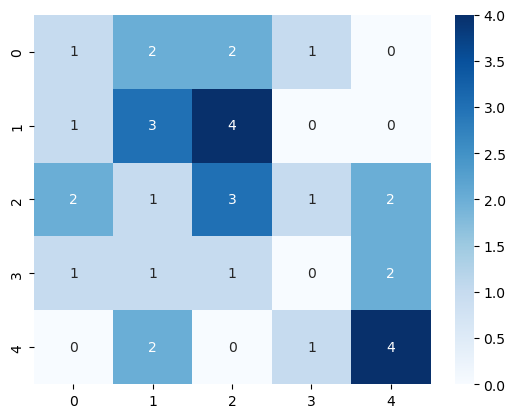

In [56]:
from sklearn.metrics import confusion_matrix, classification_report
matrix = confusion_matrix(y_test, predictions)

from seaborn import heatmap
heatmap(matrix, annot=True, cmap='Blues')

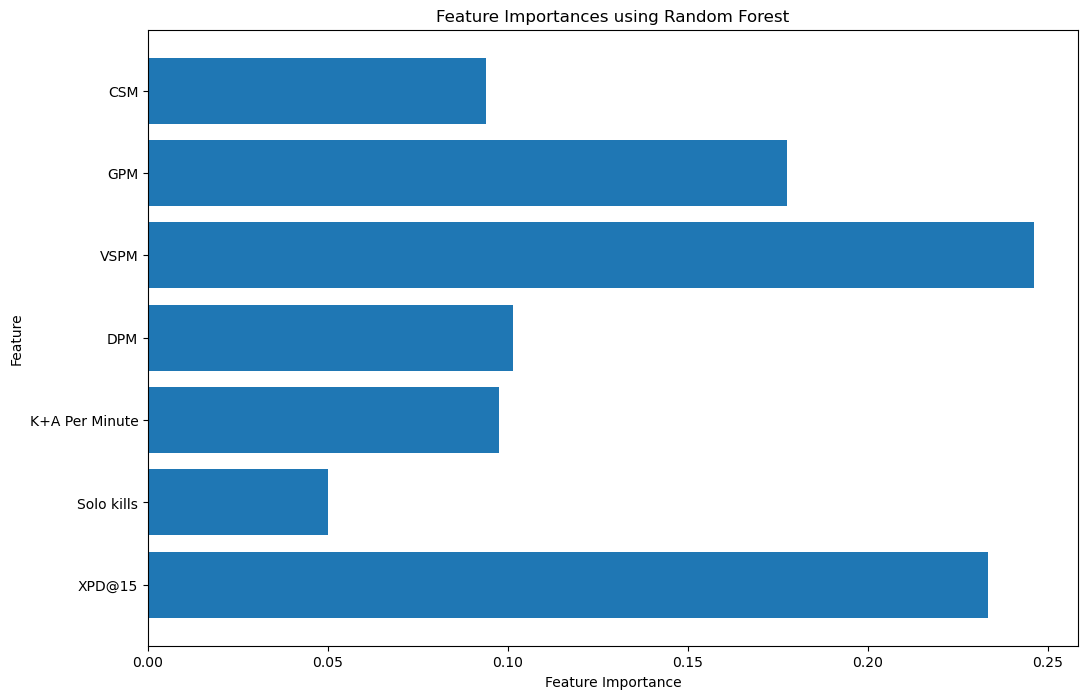

In [49]:
filtered_data = df[df['Team'].isin(['KT', 'GEN', 'Dplus KIA', 'HLE', 'T1'])]
# 'KT', 'LSB', 'DRX', 'KDF', 'BRION', 'GEN', 'Dplus KIA', 'HLE', 'NS', 'T1'

# Drop players with a frequency count less than or equal to 20
player_counts = filtered_data['Player'].value_counts()
players_to_keep = player_counts[player_counts > 20].index
filtered_data = filtered_data[filtered_data['Player'].isin(players_to_keep)]


Top_df = filtered_data[filtered_data['Role'] == 'TOP']
Top_Win_df = Top_df[Top_df['Result'] == 'Win']
Top_Win_df['Player'].value_counts()


selected_features = ['CSM', 'GPM', 'VSPM', 'DPM', 'K+A Per Minute', 'Solo kills', 'XPD@15']
X = Top_Win_df[selected_features]
y = Top_Win_df['Player']

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, stratify=y)

# Creating a StandardScaler instance.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

#Random Forest to search feature importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
rf_classifier.fit(X_train_scaled, y_train)

# Extract feature importances
feature_importances = rf_classifier.feature_importances_

import matplotlib.pyplot as plt
# Visualize the feature importances
plt.figure(figsize=(12, 8))
plt.barh(selected_features, feature_importances, align='center')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances using Random Forest')
plt.gca().invert_yaxis()
plt.show()